In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "toscana"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.00
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,250.00
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2021-01-19T17:00:00,9,Toscana,715,121,836,7419,8255,-78,241,...,26.0,13242.0,4201.0,-69.0,14.47,10.13,1.82,5.74,-3.20,-0.94
330,2021-01-20T17:00:00,9,Toscana,696,113,809,7473,8282,27,443,...,18.0,19527.0,5380.0,54.0,13.97,9.77,2.27,8.23,-6.61,0.33
331,2021-01-21T17:00:00,9,Toscana,659,116,775,7528,8303,21,503,...,14.0,14768.0,5582.0,55.0,14.97,9.33,3.41,9.01,2.65,0.25
332,2021-01-22T17:00:00,9,Toscana,642,110,752,7450,8202,-101,429,...,16.0,14959.0,5663.0,-78.0,14.63,9.17,2.87,7.58,-5.17,-1.22


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 520
Nuovi tamponi: 15040.0
Percentuale nuovi positivi/nuovi tamponi: 3.5000000000000004 %
Nuovi guariti: 440.0
Nuovi deceduti: 21.0
Variazione positivi ricoverati con sintomi: -13.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: 75.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-24T17:00:00,9,Toscana,1771,296,2067,48639,50706,-1713,962,...,47.0,11813.0,5086.0,-1652.0,14.32,4.08,8.14,18.91,0.00,-3.27
1,2020-11-25T17:00:00,9,Toscana,1754,286,2040,47240,49280,-1426,986,...,67.0,14843.0,6682.0,-1399.0,14.02,4.14,6.64,14.76,-3.38,-2.81
2,2020-11-26T17:00:00,9,Toscana,1712,281,1993,46142,48135,-1145,1351,...,72.0,16999.0,7144.0,-1098.0,14.10,4.14,7.95,18.91,-1.75,-2.32
3,2020-11-27T17:00:00,9,Toscana,1647,278,1925,44606,46531,-1604,1117,...,66.0,15081.0,6247.0,-1536.0,14.44,4.14,7.41,17.88,-1.07,-3.33
4,2020-11-28T17:00:00,9,Toscana,1593,279,1872,43200,45072,-1459,1196,...,47.0,16371.0,6312.0,-1406.0,14.90,4.15,7.31,18.95,0.36,-3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-19T17:00:00,9,Toscana,715,121,836,7419,8255,-78,241,...,26.0,13242.0,4201.0,-69.0,14.47,10.13,1.82,5.74,-3.20,-0.94
57,2021-01-20T17:00:00,9,Toscana,696,113,809,7473,8282,27,443,...,18.0,19527.0,5380.0,54.0,13.97,9.77,2.27,8.23,-6.61,0.33
58,2021-01-21T17:00:00,9,Toscana,659,116,775,7528,8303,21,503,...,14.0,14768.0,5582.0,55.0,14.97,9.33,3.41,9.01,2.65,0.25
59,2021-01-22T17:00:00,9,Toscana,642,110,752,7450,8202,-101,429,...,16.0,14959.0,5663.0,-78.0,14.63,9.17,2.87,7.58,-5.17,-1.22


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

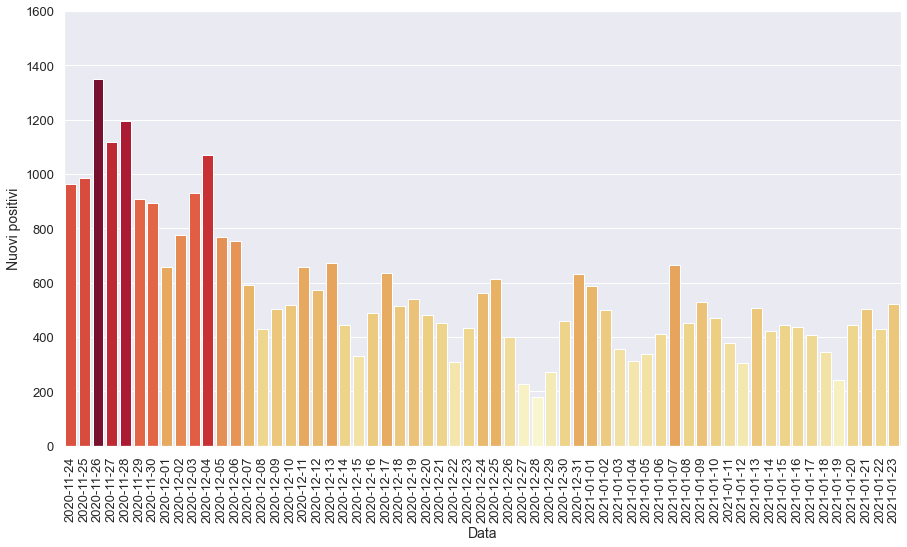

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

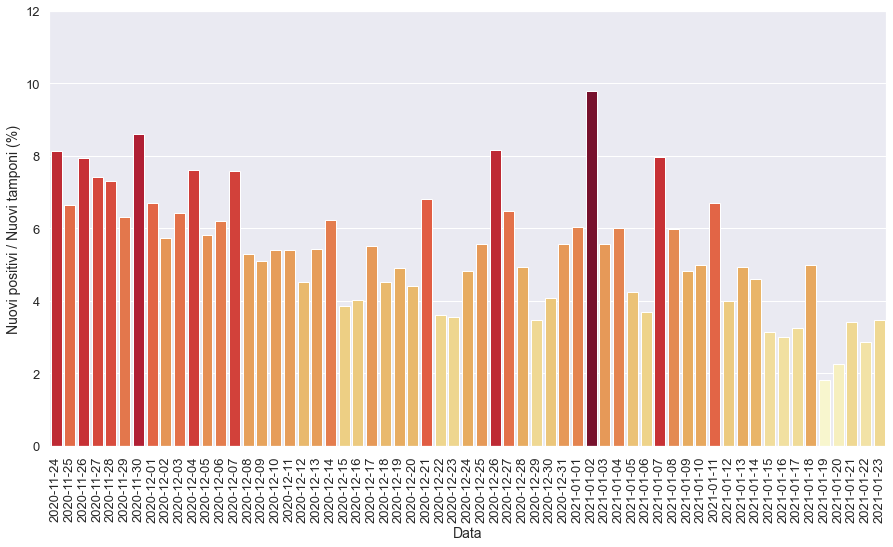

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

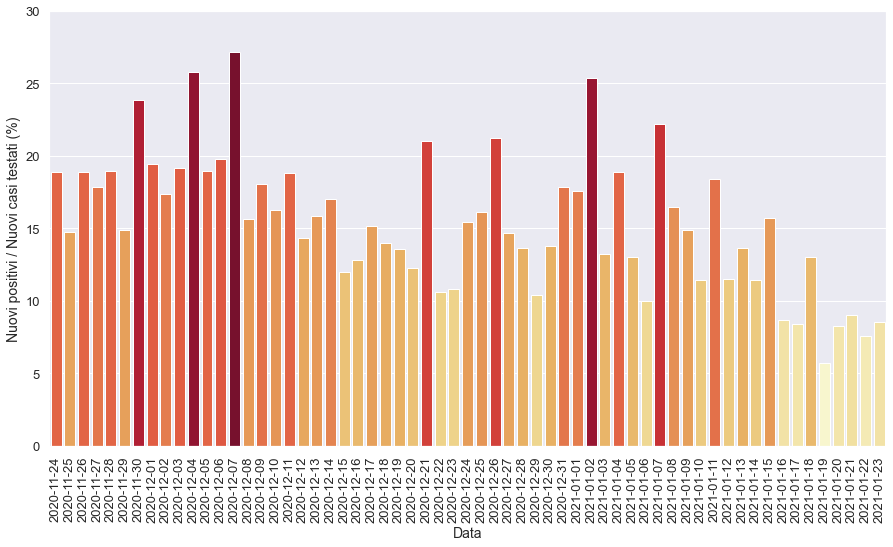

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

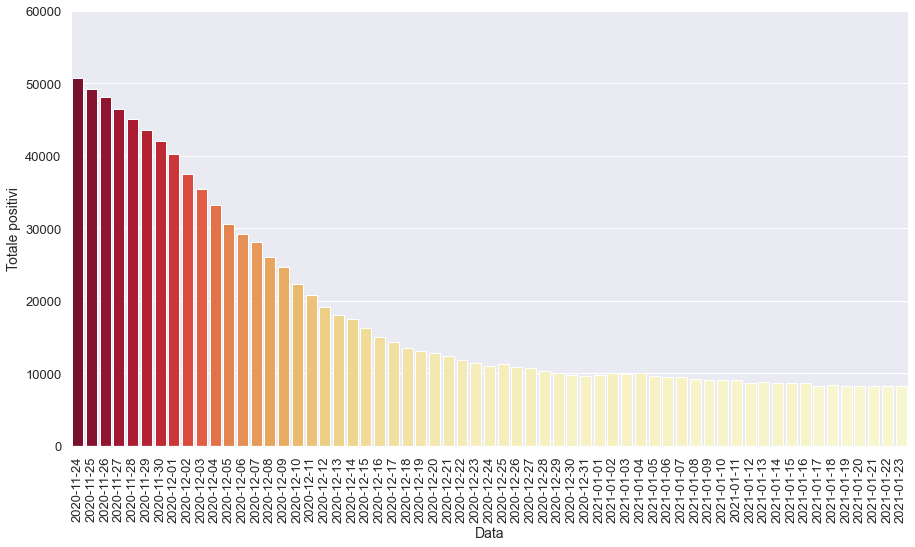

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

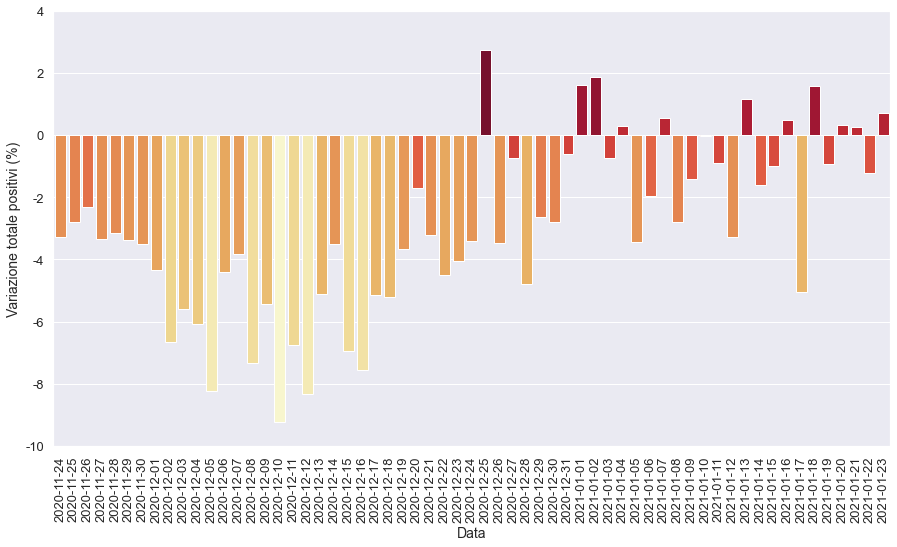

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

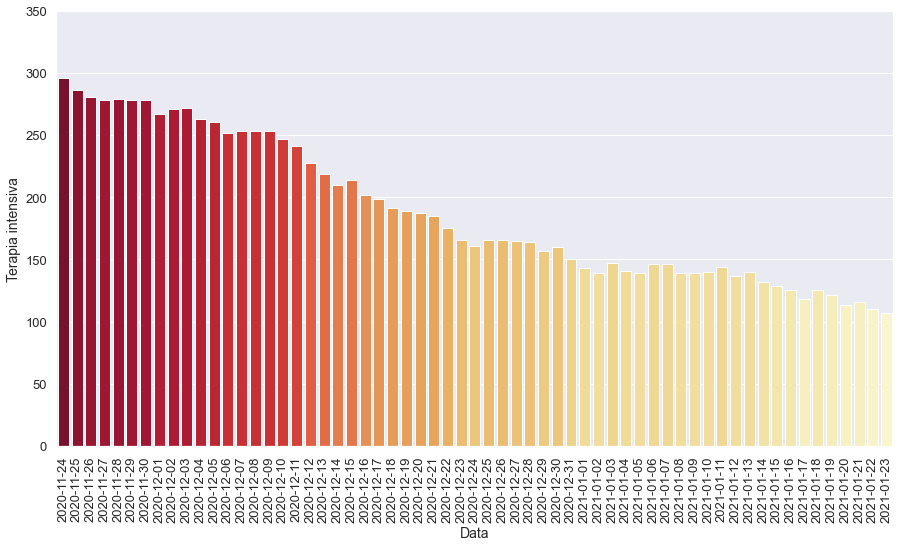

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

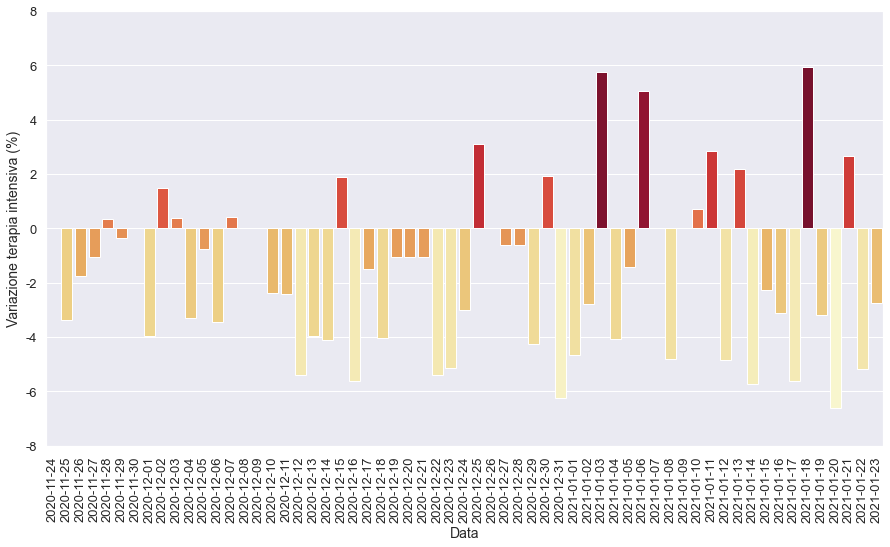

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

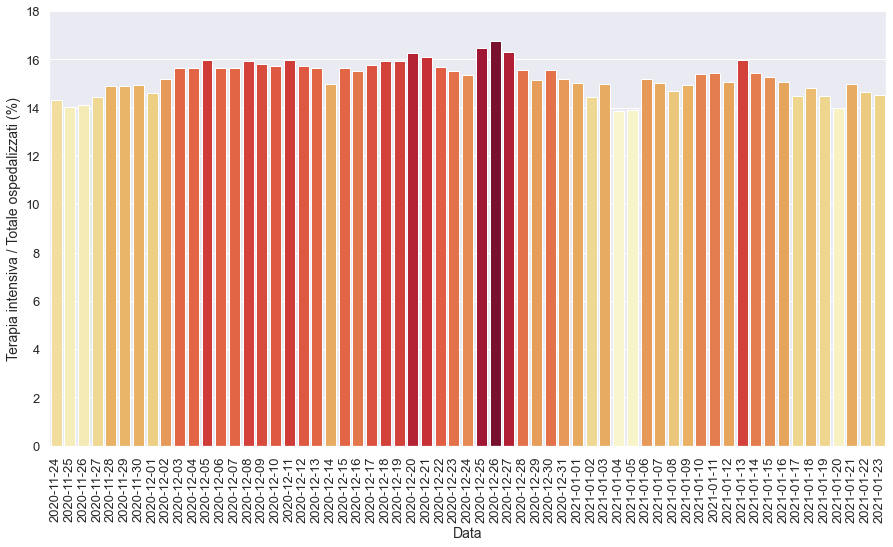

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

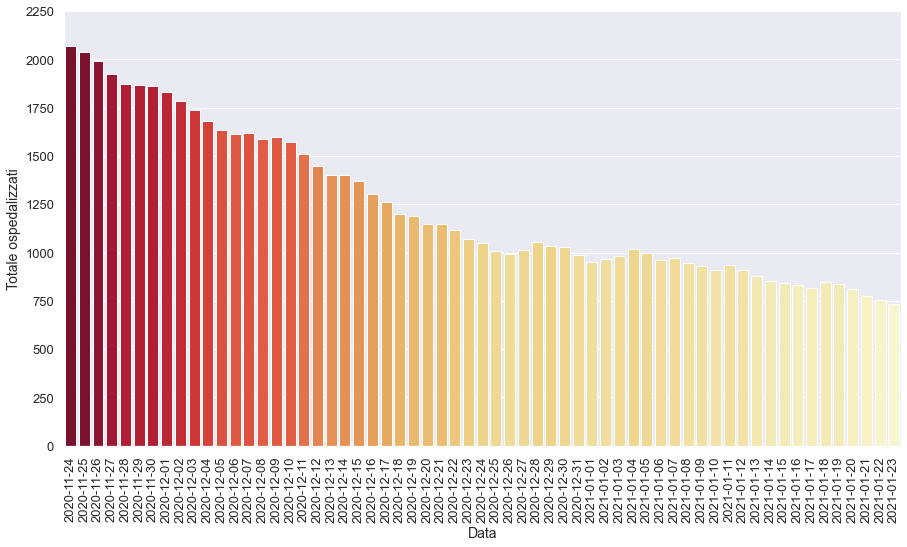

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

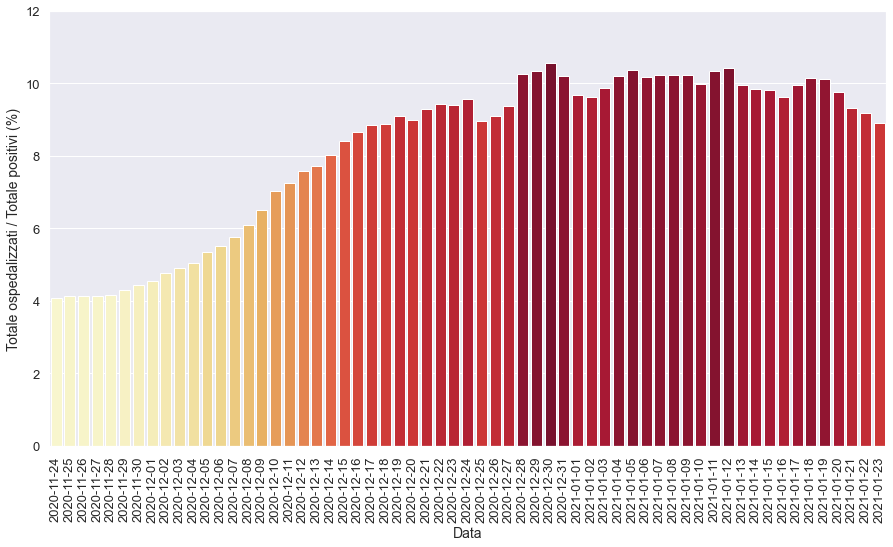

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

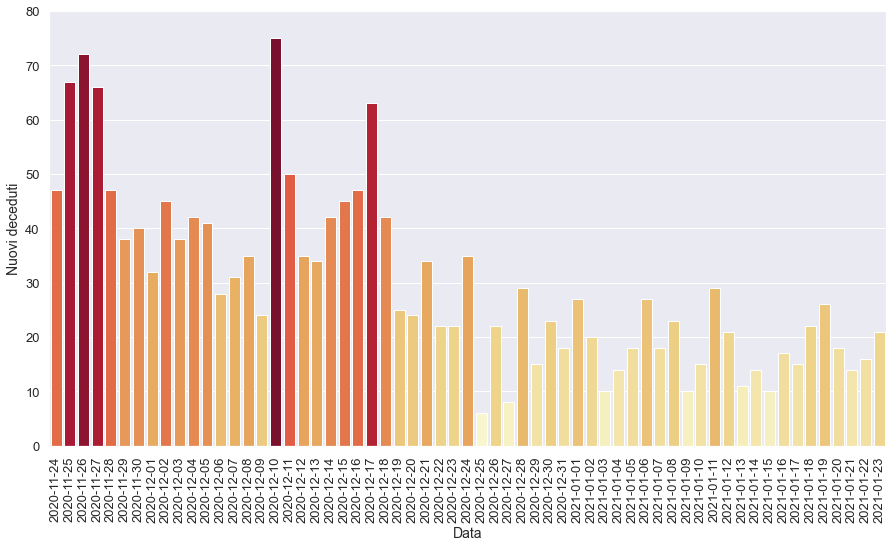

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

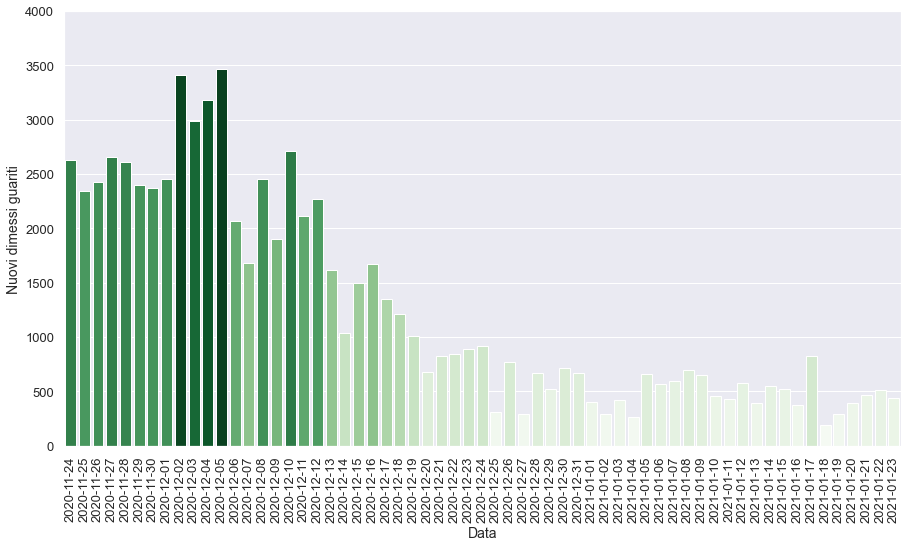

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-24T17:00:00,9,Toscana,888,161,1049,9920,10969,-388,563,...,35.0,11680.0,3639.0,-368.0,15.35,9.56,4.82,15.47,-3.01,-3.42
1,2020-12-25T17:00:00,9,Toscana,843,166,1009,10260,11269,300,613,...,6.0,11029.0,3806.0,340.0,16.45,8.95,5.56,16.11,3.11,2.73
2,2020-12-26T17:00:00,9,Toscana,825,166,991,9887,10878,-391,402,...,22.0,4920.0,1895.0,-373.0,16.75,9.11,8.17,21.21,0.00,-3.47
3,2020-12-27T17:00:00,9,Toscana,847,165,1012,9788,10800,-78,227,...,8.0,3502.0,1549.0,-99.0,16.30,9.37,6.48,14.65,-0.60,-0.72
4,2020-12-28T17:00:00,9,Toscana,890,164,1054,9230,10284,-516,181,...,29.0,3674.0,1325.0,-558.0,15.56,10.25,4.93,13.66,-0.61,-4.78
5,2020-12-29T17:00:00,9,Toscana,879,157,1036,8979,10015,-269,271,...,15.0,7802.0,2606.0,-251.0,15.15,10.34,3.47,10.40,-4.27,-2.62
6,2020-12-30T17:00:00,9,Toscana,869,160,1029,8708,9737,-278,460,...,23.0,11236.0,3346.0,-271.0,15.55,10.57,4.09,13.75,1.91,-2.78
7,2020-12-31T17:00:00,9,Toscana,838,150,988,8690,9678,-59,632,...,18.0,11353.0,3536.0,-18.0,15.18,10.21,5.57,17.87,-6.25,-0.61
8,2021-01-01T17:00:00,9,Toscana,810,143,953,8883,9836,158,589,...,27.0,9763.0,3344.0,193.0,15.01,9.69,6.03,17.61,-4.67,1.63
9,2021-01-02T17:00:00,9,Toscana,825,139,964,9057,10021,185,498,...,20.0,5083.0,1963.0,174.0,14.42,9.62,9.80,25.37,-2.80,1.88


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

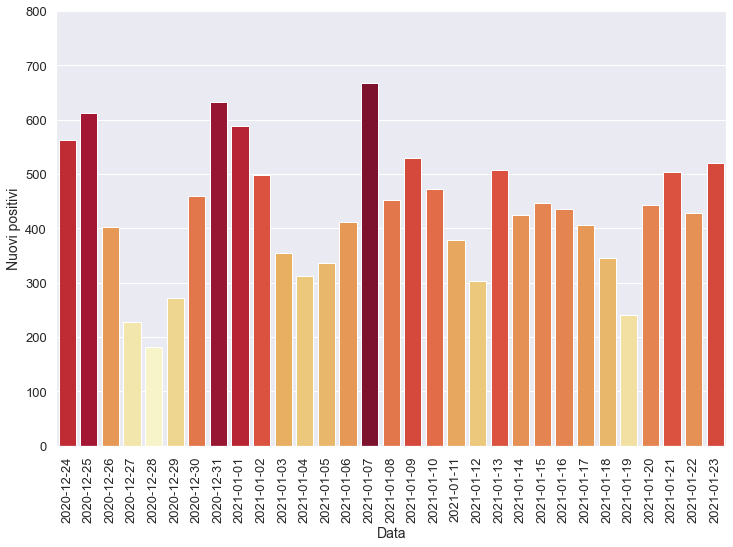

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

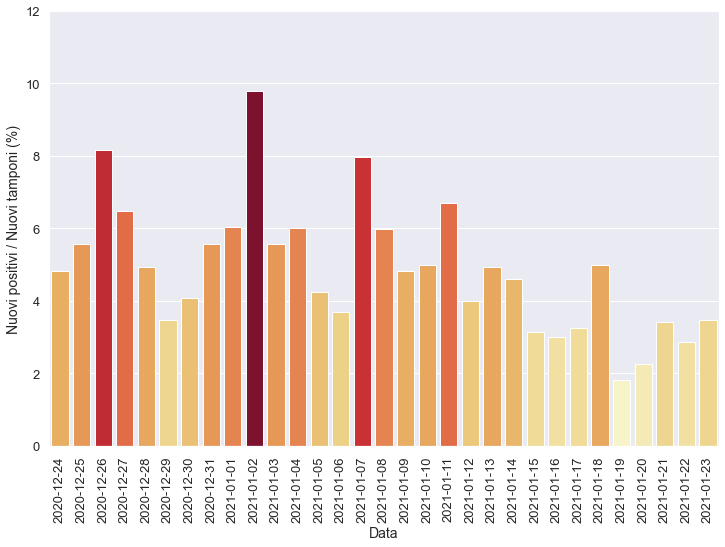

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

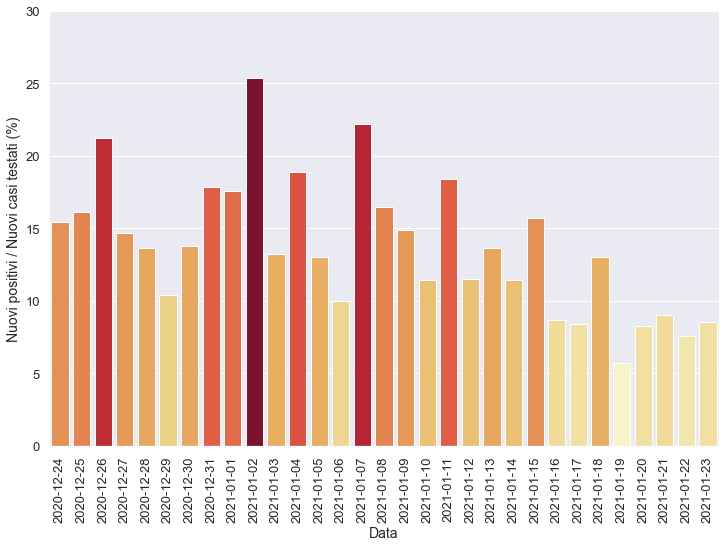

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

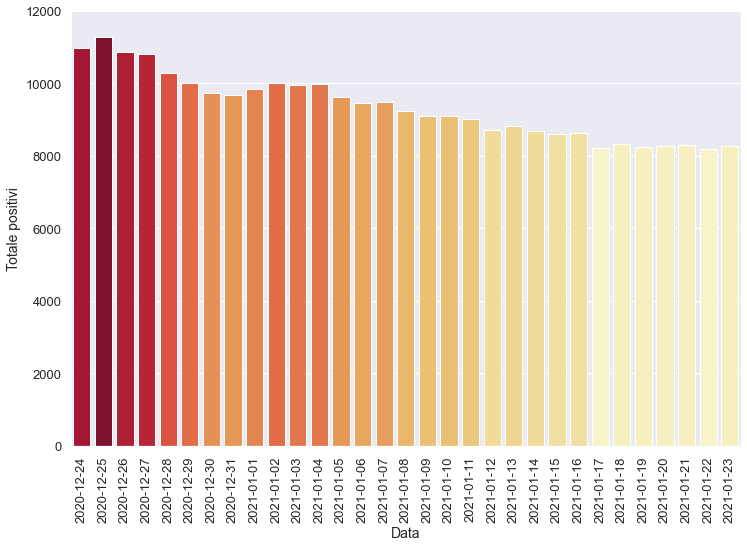

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

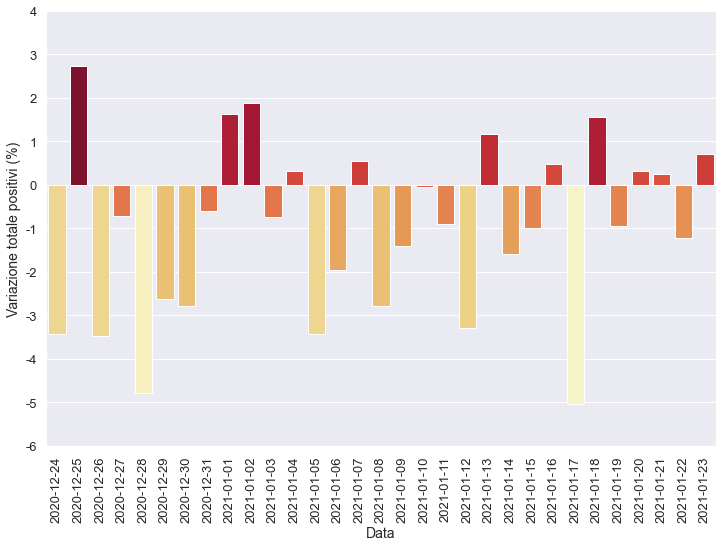

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

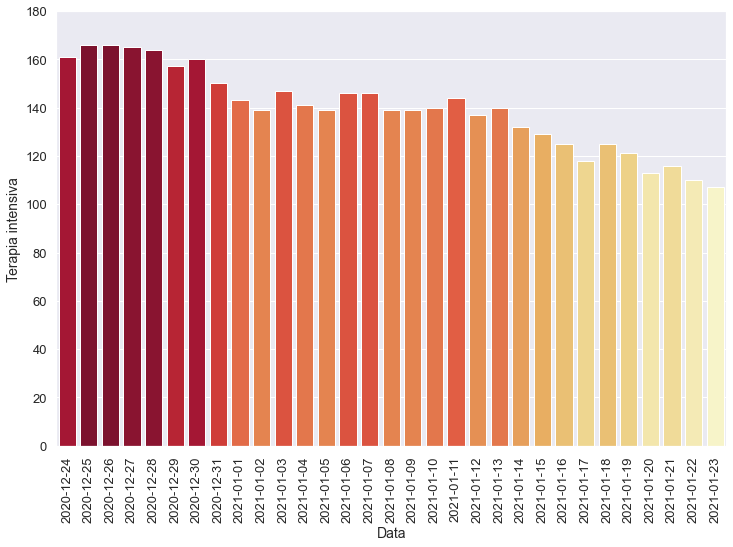

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

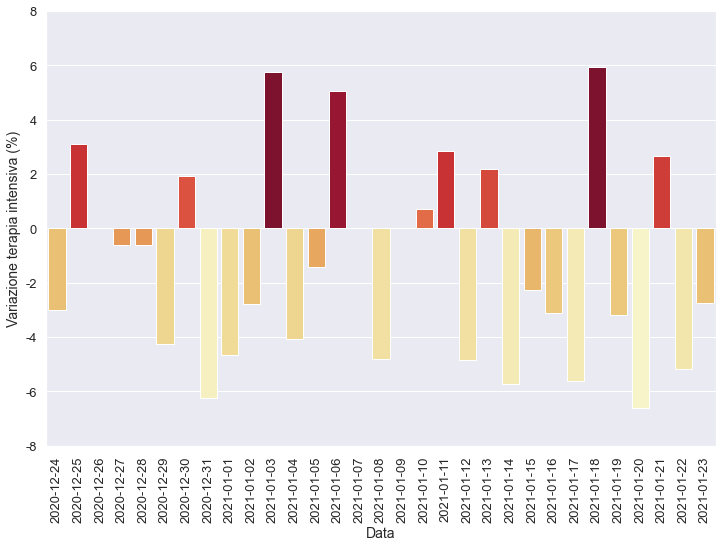

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

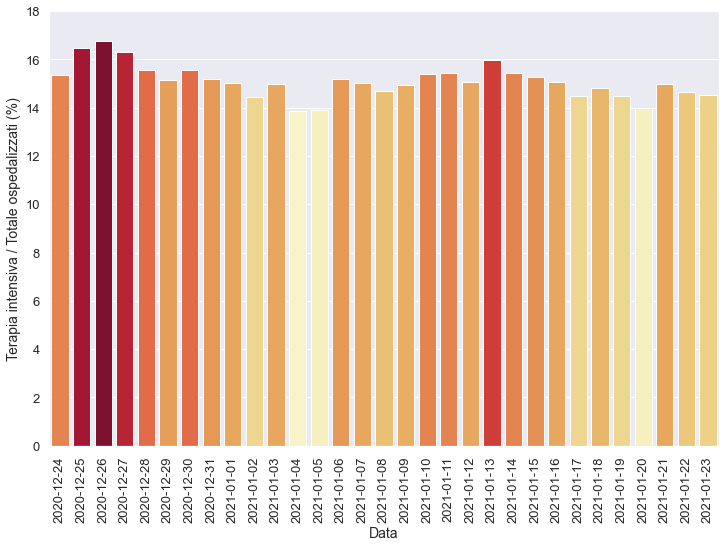

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

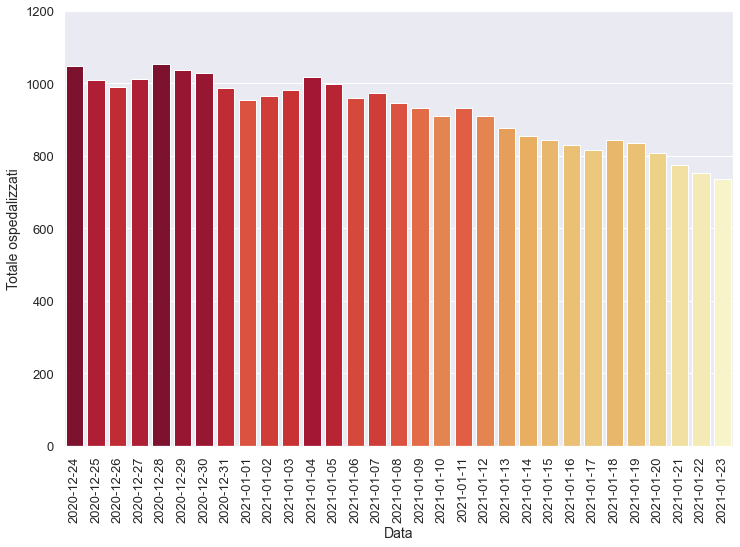

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

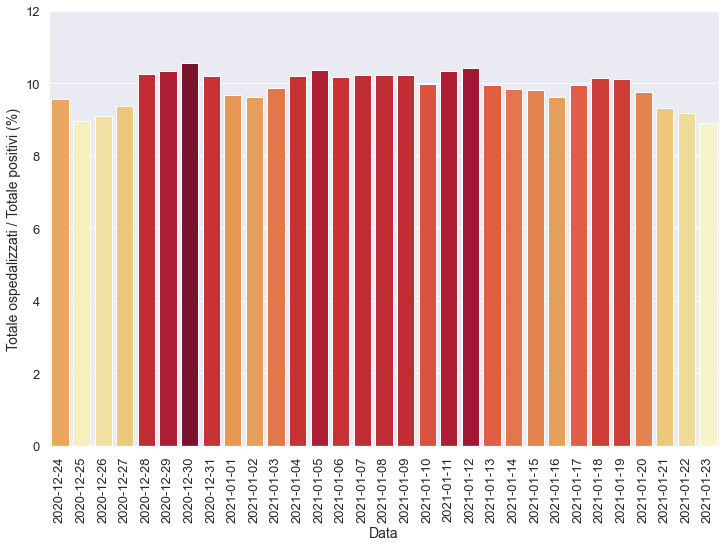

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

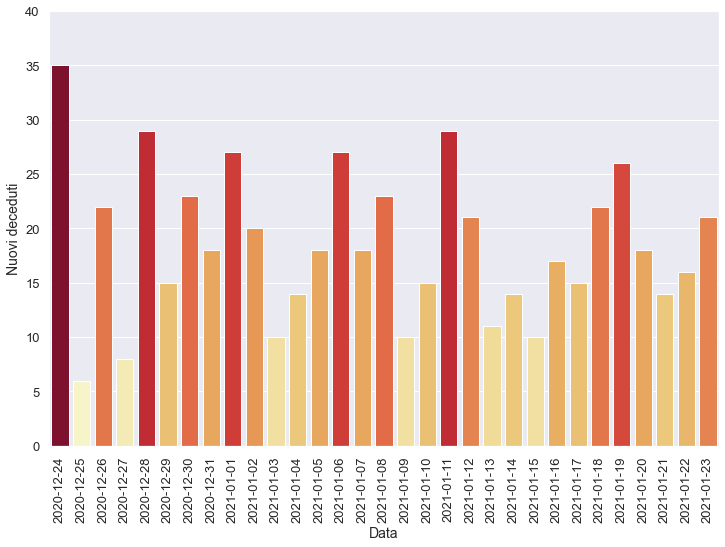

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

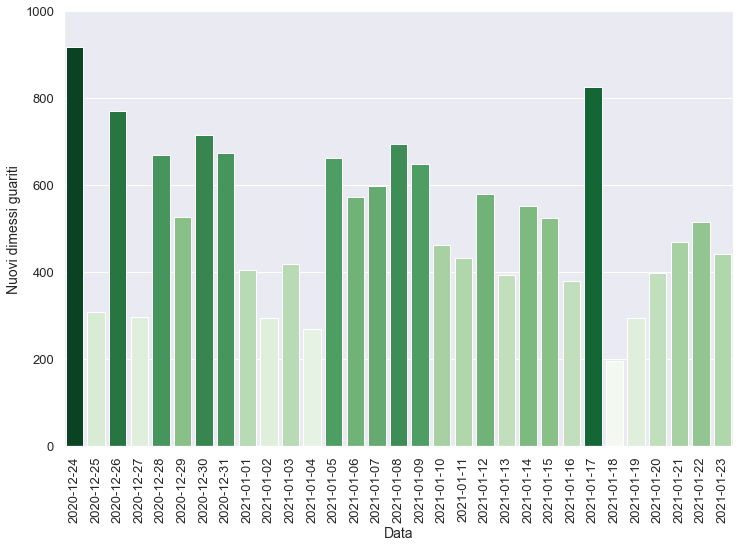

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-16T17:00:00,9,Toscana,706,125,831,7808,8639,41,436,...,17.0,14526.0,5013.0,54.0,15.04,9.62,3.00,8.70,-3.10,0.48
1,2021-01-17T17:00:00,9,Toscana,698,118,816,7388,8204,-435,406,...,15.0,12543.0,4825.0,-420.0,14.46,9.95,3.24,8.41,-5.60,-5.04
2,2021-01-18T17:00:00,9,Toscana,720,125,845,7488,8333,129,345,...,22.0,6894.0,2651.0,100.0,14.79,10.14,5.00,13.01,5.93,1.57
3,2021-01-19T17:00:00,9,Toscana,715,121,836,7419,8255,-78,241,...,26.0,13242.0,4201.0,-69.0,14.47,10.13,1.82,5.74,-3.20,-0.94
4,2021-01-20T17:00:00,9,Toscana,696,113,809,7473,8282,27,443,...,18.0,19527.0,5380.0,54.0,13.97,9.77,2.27,8.23,-6.61,0.33
5,2021-01-21T17:00:00,9,Toscana,659,116,775,7528,8303,21,503,...,14.0,14768.0,5582.0,55.0,14.97,9.33,3.41,9.01,2.65,0.25
6,2021-01-22T17:00:00,9,Toscana,642,110,752,7450,8202,-101,429,...,16.0,14959.0,5663.0,-78.0,14.63,9.17,2.87,7.58,-5.17,-1.22
7,2021-01-23T17:00:00,9,Toscana,629,107,736,7525,8261,59,520,...,21.0,15040.0,6099.0,75.0,14.54,8.91,3.46,8.53,-2.73,0.72


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

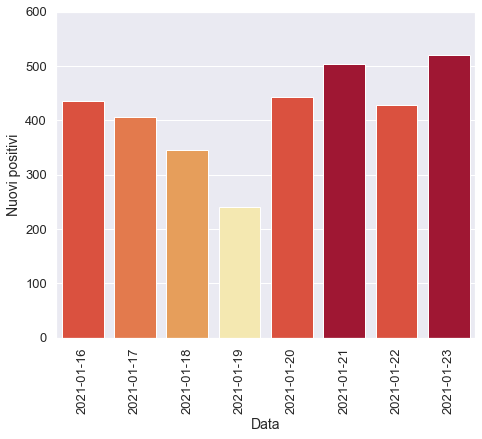

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

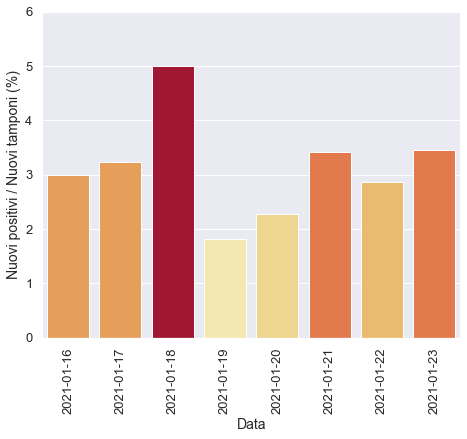

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

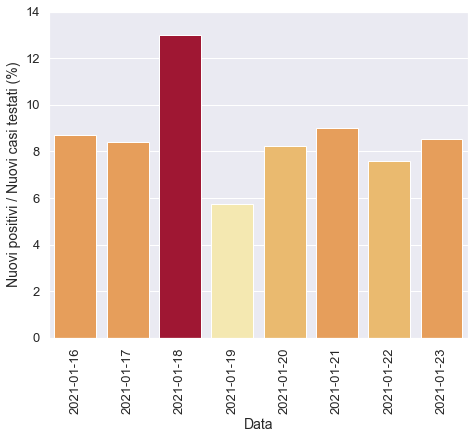

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

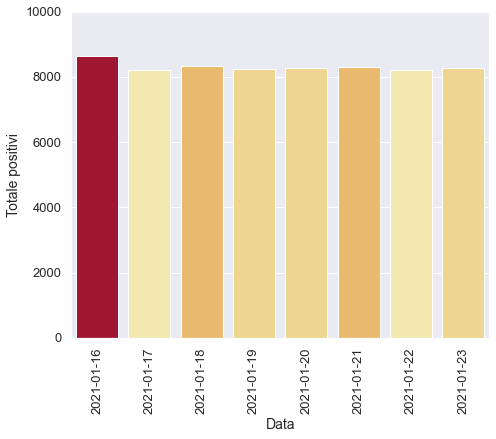

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

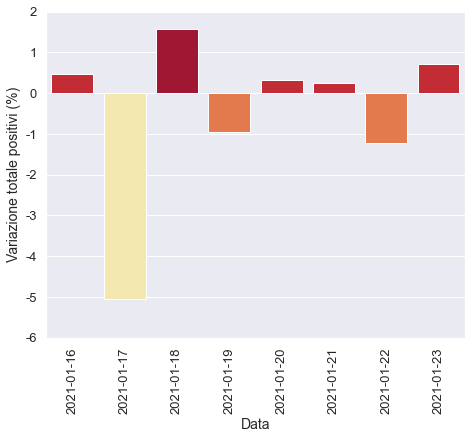

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

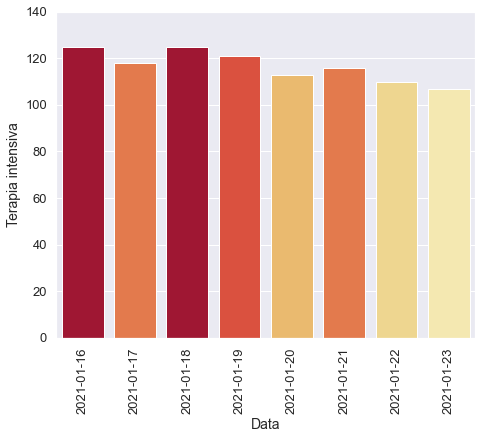

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

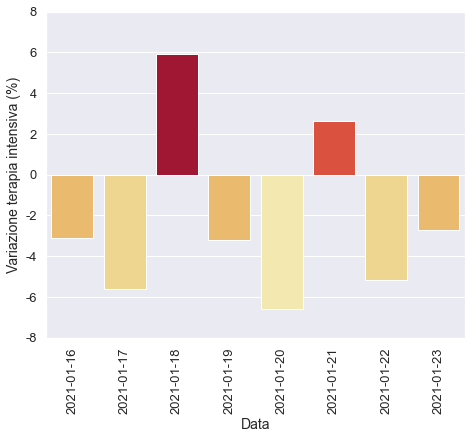

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

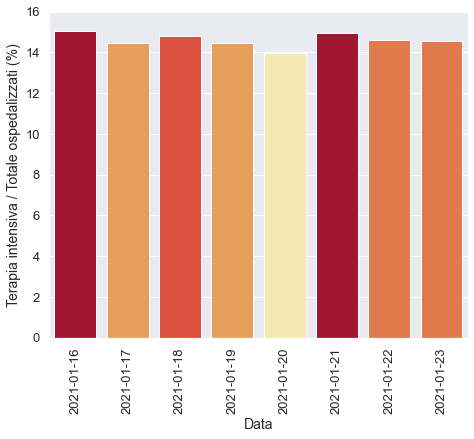

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

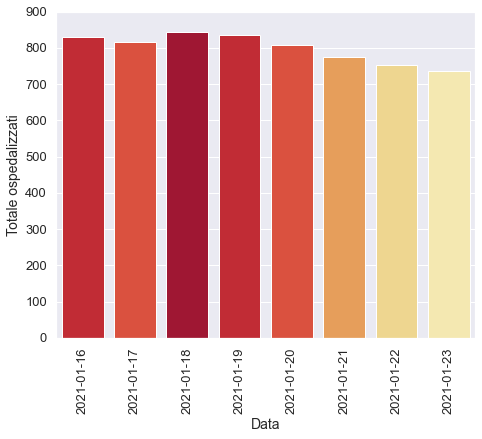

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

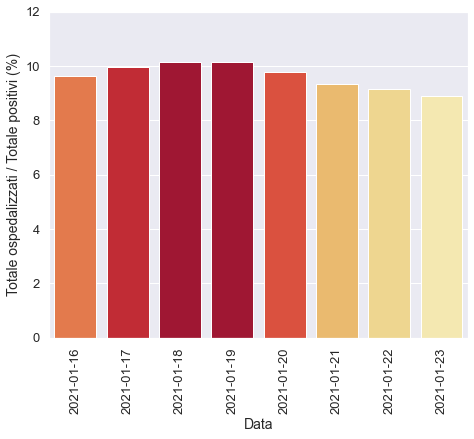

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

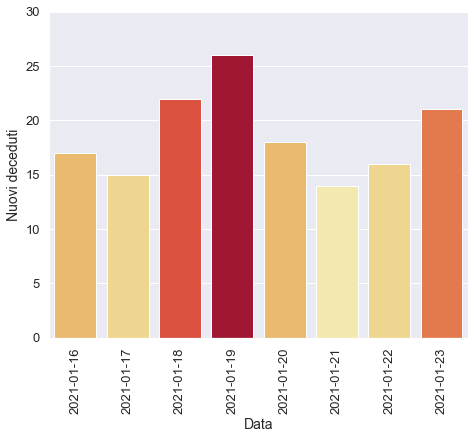

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

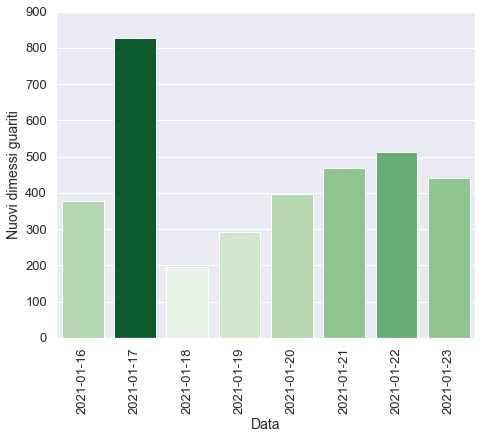

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)